## Залежності проекту

In [275]:
import numpy as np
import pandas as pd

In [276]:
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ознайомлення із набором даних

In [278]:
df.shape

(783, 12)

In [279]:
df = pd.read_csv('./real-estate-mapped-2.csv')
df.head(50)

,residence,developer,address,class,year,price,area,rooms,minutesToCityCenter,crimeRateInDistrict,district
0,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,6907950.0,54,1,48,NaN,NaN
1,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,7419650.0,58,1,48,NaN,NaN
2,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,9120000.0,80,2,48,NaN,NaN
3,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,9234000.0,81,2,48,NaN,NaN
4,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,9690000.0,85,2,48,NaN,NaN
5,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,10032000.0,88,2,48,NaN,NaN
6,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,12312000.0,108,2,48,NaN,NaN
7,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,13338000.0,117,2,48,NaN,NaN
8,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,13206375.0,117,3,48,NaN,NaN
9,А136 Highlight Tower,DIM,"вул. Антоновича, 136-138",бізнес,2023.0,14786625.0,131,3,48,NaN,NaN


## Статистика

In [280]:
df.describe()

,year,price,area,rooms,minutesToCityCenter,crimeRateInDistrict
count,1096.000000,9.910000e+02,1507.000000,1507.000000,1507.000000,1417.000000
mean,2023.399027,4.807285e+06,67.677505,1.680159,108.271400,3171.418490
std,0.750551,4.613082e+06,37.457415,0.910991,55.171398,807.647658
min,2021.000000,7.142500e+04,1.000000,1.000000,5.000000,2106.000000
25%,2023.000000,2.211725e+06,43.000000,1.000000,61.000000,2537.000000
50%,2023.000000,3.185000e+06,55.000000,1.000000,109.000000,2999.000000
75%,2024.000000,5.437650e+06,83.000000,2.000000,156.000000,3860.000000
max,2026.000000,4.374090e+07,345.000000,5.000000,284.000000,4634.000000


In [281]:
df.shape

(1507, 11)

In [282]:
df = df.drop(['year', 'district'], axis=1)
df = df.dropna().reset_index()

In [283]:
df.shape

(783, 10)

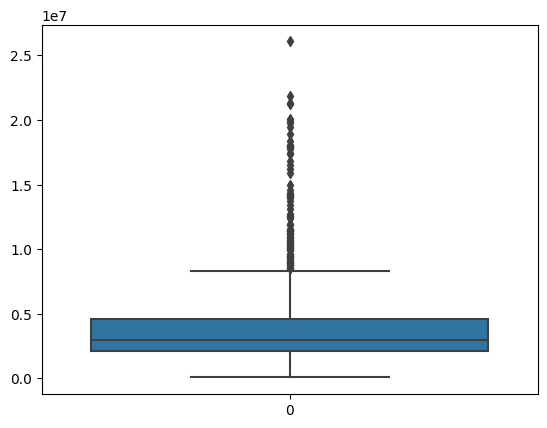

In [284]:
sns.boxplot(df['price'])
plt.show()

## Мапінг назв колонок із попереднім набором даних

In [285]:
df['predictedClass'] = df['class']
df = df.drop(['class'], axis=1)

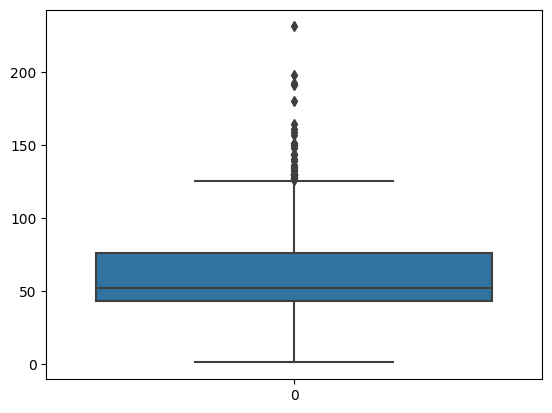

In [286]:
sns.boxplot(df['area'])
plt.show()

In [287]:
df['logprice']=np.log(df['price'])
df['logarea']=np.log(df['area'])


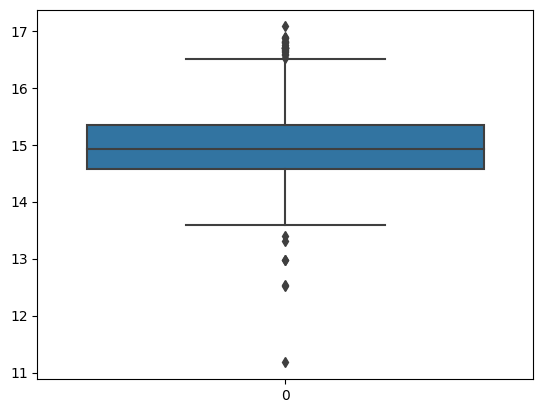

In [288]:
sns.boxplot(df['logprice'])
plt.show()

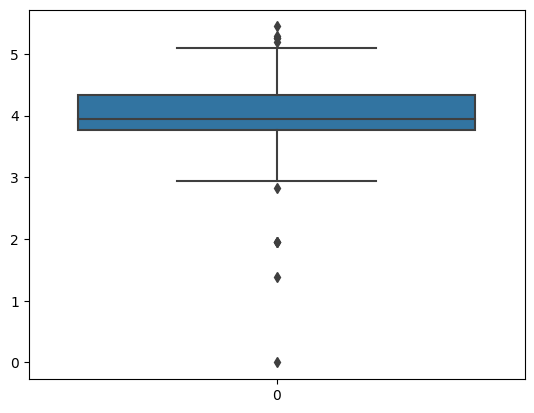

In [289]:
sns.boxplot(df['logarea'])
plt.show()

## Фільтрація набору даних від викидів

Викидами є дані що кардинально відрізняються від середніх значень що були знайдені в наборі даних.

In [290]:
q1_logprice = df['logprice'].quantile(0.25)
q3_logprice = df['logprice'].quantile(0.75)
iqr_logprice = q3_logprice - q1_logprice
lower_bound_logprice = q1_logprice - 1.5 * iqr_logprice
upper_bound_logprice = q3_logprice + 1.5 * iqr_logprice

outliers_logprice = df[(df['logprice'] < lower_bound_logprice) | (df['logprice'] > upper_bound_logprice)].index

print(outliers_logprice)


Int64Index([114, 116, 117, 118, 119, 306, 307, 308, 309, 344, 404, 405, 406,
            431, 432, 434, 489, 490, 510, 516, 527, 534, 655, 658, 659, 739,
            740, 744, 761, 771],
           dtype='int64')


In [291]:
q1_logarea = df['logarea'].quantile(0.25)
q3_logarea = df['logarea'].quantile(0.75)
iqr_logarea = q3_logarea - q1_logarea
lower_bound_logarea = q1_logarea - 1.5 * iqr_logarea
upper_bound_logarea = q3_logarea + 1.5 * iqr_logarea

outliers_logarea = df[(df['logarea'] < lower_bound_logarea) | (df['logarea'] > upper_bound_logarea)].index

print(outliers_logarea)

Int64Index([340, 344, 432, 489, 490, 510, 527, 695, 739, 740, 771], dtype='int64')


In [292]:
outliers = list(outliers_logprice.copy())
outliers.extend(list(outliers_logarea))

In [293]:
outliers

[114,
 116,
 117,
 118,
 119,
 306,
 307,
 308,
 309,
 344,
 404,
 405,
 406,
 431,
 432,
 434,
 489,
 490,
 510,
 516,
 527,
 534,
 655,
 658,
 659,
 739,
 740,
 744,
 761,
 771,
 340,
 344,
 432,
 489,
 490,
 510,
 527,
 695,
 739,
 740,
 771]

In [294]:
df1 = df.drop(outliers)
df1.shape

(751, 12)

## Обрахування значимості незалежних змінних на залежну змінну

OLS - Ordinary List Squares

In [295]:
lm_HPRICE = smf.ols(formula='price ~ area', data=df1).fit()
print(lm_HPRICE.params)
lm_HPRICE.summary()

Intercept   -328411.830204
area          68856.016177
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     562.7
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.22e-93
Time:                        11:43:22   Log-Likelihood:                -11970.
No. Observations:                 751   AIC:                         2.394e+04
Df Residuals:                     749   BIC:                         2.395e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.284e+05   1.91e+05     -1.719      0.086   -7.03e+05    4.66e+04
area        6.886e+04   2902.627     23.722      0.000    6.32e+04    7.46e+04
==============================================================================
Omnibus:                      281.372   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.910
Skew:                           1.779   Prob(JB):                    2.50e-221
Kurtosis:                       7.451   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
lm_HPRICE1 = smf.ols(formula='logprice ~ area', data=df1).fit()
print(lm_HPRICE1.params)
lm_HPRICE1.summary()

Intercept    13.999845
area          0.016140
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     738.5
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.05e-113
Time:                        11:43:22   Log-Likelihood:                -402.58
No. Observations:                 751   AIC:                             809.2
Df Residuals:                     749   BIC:                             818.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9998      0.039    358.132      0.000      13.923      14.077
area           0.0161      0.001     27.176      0.000       0.015       0.017
==============================================================================
Omnibus:                       59.822   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.294
Skew:                           0.726   Prob(JB):                     2.00e-16
Kurtosis:                       3.453   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
lm_HPRICE2 = smf.ols(formula='logprice ~ logarea', data=df1).fit()
print(lm_HPRICE2.params)
lm_HPRICE2.summary()

Intercept    10.357519
logarea       1.146693
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     912.8
Date:                Tue, 16 May 2023   Prob (F-statistic):          9.57e-132
Time:                        11:43:23   Log-Likelihood:                -360.98
No. Observations:                 751   AIC:                             726.0
Df Residuals:                     749   BIC:                             735.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3575      0.154     67.409      0.000      10.056      10.659
logarea        1.1467      0.038     30.213      0.000       1.072       1.221
==============================================================================
Omnibus:                       61.066   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.002
Skew:                           0.750   Prob(JB):                     8.52e-17
Kurtosis:                       3.338   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='logarea', ylabel='logprice'>

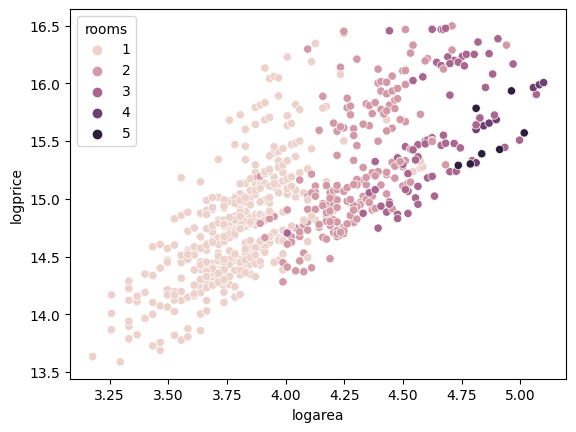

In [298]:
sns.scatterplot(data=df1, x='logarea', y='logprice', hue='rooms')

In [299]:
# sns.scatterplot(data=df1, x='numApartmentsTotal', y='logprice')

In [300]:
# sns.scatterplot(data=df1, x='ceilingHeight', y='logprice', hue='ceilingHeight')

<AxesSubplot: xlabel='predictedClass', ylabel='logprice'>

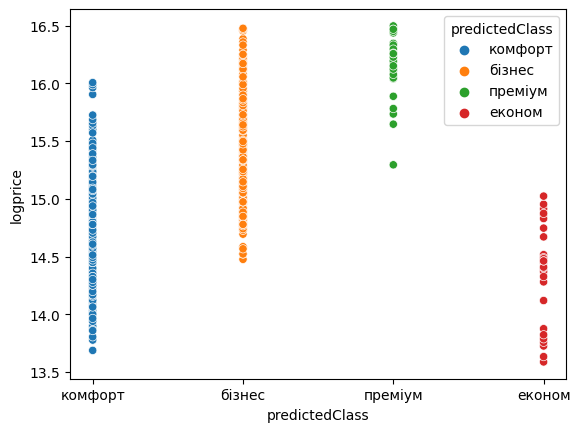

In [301]:
sns.scatterplot(data=df1, x='predictedClass', y='logprice', hue='predictedClass')

In [302]:
df1['predictedClass'] = df['predictedClass'].replace({'комфорт': 1, 'бізнес': 2, 'преміум': 3, 'економ': 4})


In [303]:
lm_HPRICE3 = smf.ols(formula='logprice ~ logarea + rooms', data=df1).fit()
print(lm_HPRICE3.params)
lm_HPRICE3.summary()

Intercept    8.815830
logarea      1.634830
rooms       -0.275726
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     540.6
Date:                Tue, 16 May 2023   Prob (F-statistic):          5.74e-146
Time:                        11:43:23   Log-Likelihood:                -324.45
No. Observations:                 751   AIC:                             654.9
Df Residuals:                     748   BIC:                             668.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8158      0.229     38.458      0.000       8.366       9.266
logarea        1.6348      0.067     24.572      0.000       1.504       1.765
rooms         -0.2757      0.032     -8.742      0.000      -0.338      -0.214
==============================================================================
Omnibus:                       56.883   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.316
Skew:                           0.695   Prob(JB):                     1.46e-15
Kurtosis:                       3.501   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# lm_HPRICE4 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight', data=df1).fit()
# print(lm_HPRICE4.params)
# lm_HPRICE4.summary()

In [305]:
# lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
# print(lm_HPRICE5.params)
# lm_HPRICE5.summary()

In [306]:
# lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal', data=df1).fit()
# print(lm_HPRICE5.params)
# lm_HPRICE5.summary()

In [307]:
# lm_HPRICE5 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor', data=df1).fit()
# print(lm_HPRICE5.params)
# lm_HPRICE5.summary()

In [308]:
# lm_HPRICE6 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict', data=df1).fit()
# print(lm_HPRICE6.params)
# lm_HPRICE6.summary()

In [309]:
# lm_HPRICE7 = smf.ols(formula='logprice ~ logarea + rooms + ceilingHeight + numApartmentsTotal + floor + crimeRateInDistrict + predictedClass', data=df1).fit()
# print(lm_HPRICE7.params)
# lm_HPRICE7.summary()

In [310]:
# lm_HPRICE8 = smf.ols(formula='logprice ~ logarea + predictedClass', data=df1).fit()
# print(lm_HPRICE8.params)
# lm_HPRICE8.summary()

### Зміна підходу при побудові моделі лінійної регресії

In [311]:
# X = df1[['area', 'rooms', 'crimeRateInDistrict', 'predictedClass', 'minutesToCityCenter']]
# Y = df1[['price']]

# lm_HPRICE9 = sm.OLS(Y, X).fit()
# print(lm_HPRICE9.params)
# lm_HPRICE9.summary()

### Найменша кількість незалежних змінних

In [312]:
lm_HPRICE10 = smf.ols(formula='logprice ~ logarea + rooms + crimeRateInDistrict + predictedClass + minutesToCityCenter', data=df1).fit()
print(lm_HPRICE10.params)
lm_HPRICE10.summary()

Intercept              10.453228
logarea                 1.334272
rooms                  -0.214330
crimeRateInDistrict    -0.000061
predictedClass          0.106874
minutesToCityCenter    -0.004229
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     478.4
Date:                Tue, 16 May 2023   Prob (F-statistic):          9.74e-230
Time:                        11:43:23   Log-Likelihood:                -120.40
No. Observations:                 751   AIC:                             252.8
Df Residuals:                     745   BIC:                             280.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.4532      0.192     54.445      0.000      10.076      10.830
logarea                 1.3343      0.053     25.335      0.000       1.231       1.438
rooms                  -0.2143      0.024     -8.826      0.000      -0.262      -0.167
crimeRateInDistrict -6.142e-05   1.31e-05     -4.681      0.000   -8.72e-05   -3.57e-05
predictedClass          0.1069      0.014      7.512      0.000       0.079       0.135
minutesToCityCenter    -0.0042      0.000    -20.315      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       14.867   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.551
Skew:                          -0.010   Prob(JB):                     1.04e-06
Kurtosis:                       3.938   Cond. No.                     6.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Прогнозування вартості нерухомості

In [313]:
# real_estate = df1.sample()[['logarea', 'rooms', 'crimeRateInDistrict', 'predictedClass']]

In [314]:
# real_estate

In [315]:
# real_estate_info = df1.loc[df1.index == real_estate.index.values[0]][['residence', 'address', 'predictedClass']].values[0]

In [316]:
# real_estate_info

In [317]:
# logprice_predicted = lm_HPRICE7.predict(real_estate).values[0]

In [318]:
# import math

Зворотня операція до log - exp

In [319]:
# predicted_price = math.exp(logprice_predicted)
# price_formatted = "{:,}".format(round(predicted_price))

In [320]:
# f"Ціна квартири в {real_estate_info[0]} за адресою {real_estate_info[1]} із класом житла {real_estate_info[2]} оцінена в {price_formatted} гривень"

## Прогнозування вартості нерухомості з урахуванням дальності до центру

In [321]:
real_estate = df1.sample()[['logarea', 'rooms', 'crimeRateInDistrict', 'predictedClass', 'minutesToCityCenter']]

In [322]:
real_estate

,logarea,rooms,crimeRateInDistrict,predictedClass,minutesToCityCenter
702,4.477337,2,4634.0,2,40


#### Зміна minutesToCityCenter

In [323]:
# real_estate['minutesToCityCenter'] = 10

In [324]:
real_estate.index.values[0]

702

In [325]:
real_estate_info = df1.loc[df1.index == real_estate.index.values[0]][['residence', 'address', 'predictedClass', 'price']].values[0]

In [326]:
real_estate_info

array(['ЖК Камертон', 'вул. Річна, 4', 2, 8505200.0], dtype=object)

In [327]:
logprice_predicted = lm_HPRICE10.predict(real_estate).values[0]

In [328]:
import math

Зворотня операція до log - exp

In [329]:
predicted_price = math.exp(logprice_predicted)
price_formatted = "{:,}".format(round(predicted_price))

In [330]:
f"Ціна квартири в {real_estate_info[0]} за адресою {real_estate_info[1]} із класом житла {real_estate_info[2]} оцінена в {price_formatted} гривень"

'Ціна квартири в ЖК Камертон за адресою вул. Річна, 4 із класом житла 2 оцінена в 6,979,705 гривень'

## Експорт моделі для подальшого використання на сервері

In [331]:
# lm_HPRICE7.save("lm_HPRICE7.pickle")

In [332]:
# lm_HPRICE10.save("lm_HPRICE10.pickle")

Довільний приклад для тестування моделі